In [3]:
import os
import spotipy
import pandas as pd
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
load_dotenv()


client_id = os.environ.get("SPOTIPY_CLIENT_ID")
client_secret = os.environ.get("SPOTIPY_CLIENT_SECRET")


lz_uri = 'spotify:artist:2IMZYfNi21MGqxopj9fWx8'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spotify.artist_top_tracks(lz_uri)

In [29]:
def segundos_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{minutos}:{segundos}"

In [5]:
top_track = []

for track in results['tracks'][:10]:
    duracion = round(track['duration_ms']/1000)

    top_track.append(dict(track))

    print(f"Nombre de la canción: {track['name']}, popularidad: {track['popularity']}, duración: {segundos_minutos(duracion)} minutos.")


Nombre de la canción: cómo dormiste?, popularidad: 84, duración: 01:53 minutos.
Nombre de la canción: A Mí, popularidad: 83, duración: 03:30 minutos.
Nombre de la canción: Un Rodeoooo, popularidad: 79, duración: 02:16 minutos.
Nombre de la canción: lo que hay x aquí, popularidad: 82, duración: 02:35 minutos.
Nombre de la canción: qué le pasa conmigo?, popularidad: 78, duración: 02:47 minutos.
Nombre de la canción: Me Gustas Natural, popularidad: 80, duración: 02:50 minutos.
Nombre de la canción: Mi Luz (ft. Rels B), popularidad: 79, duración: 02:48 minutos.
Nombre de la canción: miamor, popularidad: 68, duración: 02:39 minutos.
Nombre de la canción: pa quererte, popularidad: 78, duración: 02:47 minutos.
Nombre de la canción: La Última Canción, popularidad: 77, duración: 03:05 minutos.


In [73]:
df = pd.DataFrame(top_track, columns=['name', 'popularity', 'duration_ms'])
df['duration_ms'] = (df['duration_ms']/1000).round()
df['duracion_min'] = df.duration_ms.apply(segundos_minutos)
df_ordenado = df.sort_values('popularity',ascending=False).head()

df_final = pd.DataFrame(df_ordenado,columns=['name', 'popularity', 'duracion_min'])

df_final



,name,popularity,duracion_min
0,cómo dormiste?,84,1:53.0
1,A Mí,83,3:30.0
3,lo que hay x aquí,82,2:35.0
5,Me Gustas Natural,80,2:50.0
2,Un Rodeoooo,79,2:16.0


A mayor duración de la canción menor es su popularidad en este caso


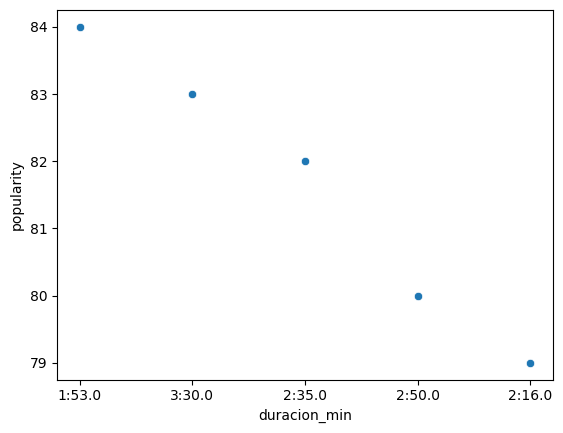

In [72]:
scatter_plot = sns.scatterplot(data = df_final, x= df_final['duracion_min'] , y = df_final['popularity'])
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")
print('A mayor duración de la canción menor es su popularidad en este caso')